In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [4]:
#1. Load and Inspect the Data
#Read the dataset using Pandas.
#Check for missing values and data types.

In [6]:
# Load the dataset
df = pd.read_csv('ert_dly_fir_2024.csv.bz2')  

In [8]:
# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              20130 non-null  int64  
 1   MONTH_NUM         20130 non-null  int64  
 2   MONTH_MON         20130 non-null  object 
 3   FLT_DATE          20130 non-null  object 
 4   ENTITY_NAME       20130 non-null  object 
 5   ENTITY_TYPE       20130 non-null  object 
 6   FLT_ERT_1         20130 non-null  int64  
 7   DLY_ERT_1         11006 non-null  float64
 8   DLY_ERT_A_1       11006 non-null  float64
 9   DLY_ERT_C_1       11006 non-null  float64
 10  DLY_ERT_D_1       11006 non-null  float64
 11  DLY_ERT_E_1       11006 non-null  float64
 12  DLY_ERT_G_1       11006 non-null  float64
 13  DLY_ERT_I_1       11006 non-null  float64
 14  DLY_ERT_M_1       11006 non-null  float64
 15  DLY_ERT_N_1       11006 non-null  float64
 16  DLY_ERT_O_1       11006 non-null  float6

In [10]:
# Handle missing values
df = df.dropna()

In [12]:
# Rename columns for clarity
delay_categories = {
    'DLY_ERT_A_1': 'Accident/Incident',
    'DLY_ERT_C_1': 'ATC Capacity',
    'DLY_ERT_D_1': 'De-icing',
    'DLY_ERT_E_1': 'Equipment (non-ATC)',
    'DLY_ERT_G_1': 'Aerodrome Capacity',
    'DLY_ERT_I_1': 'Industrial Action (ATC)',
    'DLY_ERT_M_1': 'Airspace Management',
    'DLY_ERT_N_1': 'Industrial Action (non-ATC)',
    'DLY_ERT_O_1': 'Other',
    'DLY_ERT_P_1': 'Special Event',
    'DLY_ERT_R_1': 'ATC Routeing',
    'DLY_ERT_S_1': 'ATC Staffing',
    'DLY_ERT_T_1': 'Equipment (ATC)',
    'DLY_ERT_V_1': 'Environmental Issues',
    'DLY_ERT_W_1': 'Weather',
    'DLY_ERT_NA_1': 'Not Specified'
}
df = df.rename(columns=delay_categories)


In [14]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 11006 entries, 3 to 20129
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         11006 non-null  int64  
 1   MONTH_NUM                    11006 non-null  int64  
 2   MONTH_MON                    11006 non-null  object 
 3   FLT_DATE                     11006 non-null  object 
 4   ENTITY_NAME                  11006 non-null  object 
 5   ENTITY_TYPE                  11006 non-null  object 
 6   FLT_ERT_1                    11006 non-null  int64  
 7   DLY_ERT_1                    11006 non-null  float64
 8   Accident/Incident            11006 non-null  float64
 9   ATC Capacity                 11006 non-null  float64
 10  De-icing                     11006 non-null  float64
 11  Equipment (non-ATC)          11006 non-null  float64
 12  Aerodrome Capacity           11006 non-null  float64
 13  Industrial Action (AT

In [16]:
 df_1 = df[df['MONTH_NUM'] == 12]
display(df_1)

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,ENTITY_NAME,ENTITY_TYPE,FLT_ERT_1,DLY_ERT_1,Accident/Incident,ATC Capacity,...,Other,Special Event,ATC Routeing,ATC Staffing,Equipment (ATC),Environmental Issues,Weather,Not Specified,FLT_ERT_1_DLY,FLT_ERT_1_DLY_15
18428,2024,12,DEC,2024-12-01T00:00:00Z,BLUE MED FAB,FAB (FIR),6503,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18429,2024,12,DEC,2024-12-01T00:00:00Z,Baltic FAB,FAB (FIR),1865,307.0,0.0,0.0,...,275.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,25.0,5.0
18430,2024,12,DEC,2024-12-01T00:00:00Z,Belgium,COUNTRY (FIR),2969,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18431,2024,12,DEC,2024-12-01T00:00:00Z,Bosnia and Herzegovina,COUNTRY (FIR),1171,146.0,0.0,146.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,2.0
18436,2024,12,DEC,2024-12-01T00:00:00Z,DANUBE FAB,FAB (FIR),2922,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20122,2024,12,DEC,2024-12-31T00:00:00Z,Spain Continental,COUNTRY (FIR),4927,4407.0,0.0,2747.0,...,0.0,0.0,0.0,0.0,34.0,0.0,1626.0,0.0,429.0,93.0
20124,2024,12,DEC,2024-12-31T00:00:00Z,Switzerland,COUNTRY (FIR),2293,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20126,2024,12,DEC,2024-12-31T00:00:00Z,UK Continental,COUNTRY (FIR),5116,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20128,2024,12,DEC,2024-12-31T00:00:00Z,UK-Ireland FAB,FAB (FIR),5199,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Convert date column to datetime if applicable
df['FLT_DATE'] = pd.to_datetime(df['FLT_DATE'])

# Feature Engineering: Extract time-based features
df['month'] = df['FLT_DATE'].dt.month
df['day_of_week'] = df['FLT_DATE'].dt.dayofweek
df['hour'] = df['FLT_DATE'].dt.hour

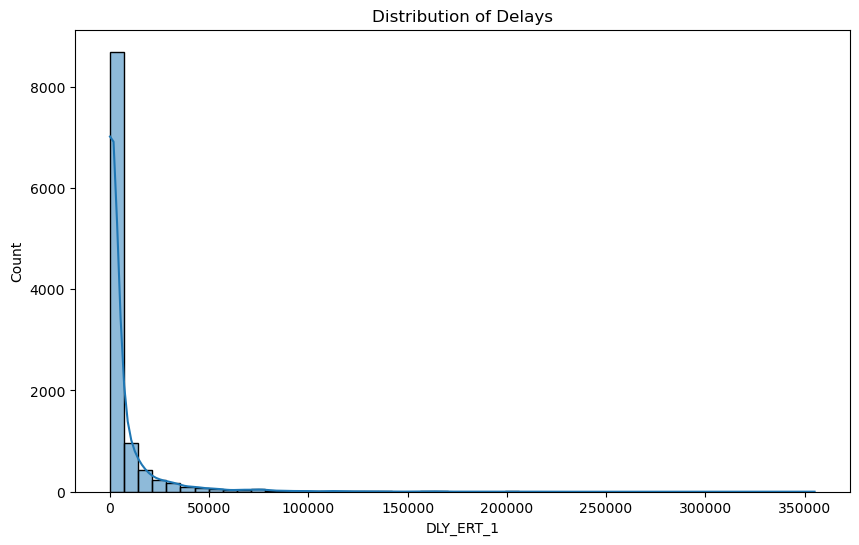

In [20]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.histplot(df['DLY_ERT_1'], bins=50, kde=True)
plt.title('Distribution of Delays')
plt.show()

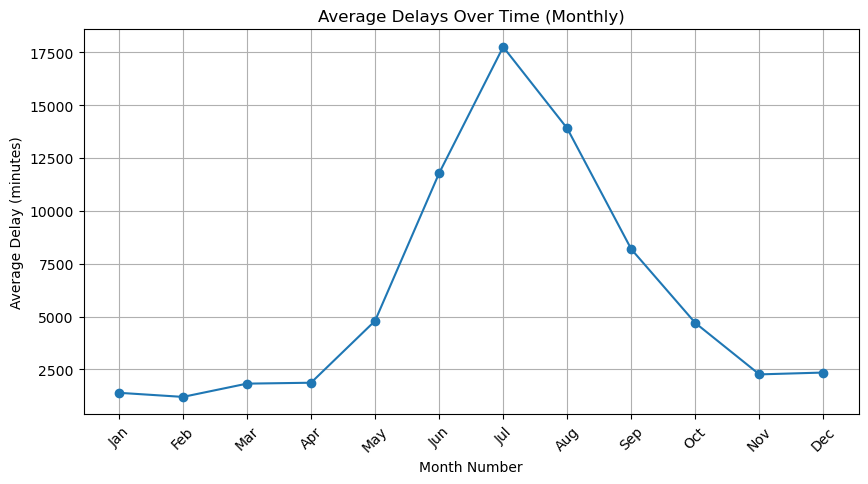

In [22]:
# Group by month and calculate the average delay
monthly_avg_delay = df.groupby('MONTH_NUM')['DLY_ERT_1'].mean()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_delay.index, monthly_avg_delay.values, marker='o', linestyle='-')

plt.title('Average Delays Over Time (Monthly)')
plt.xlabel('Month Number')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)

plt.show()

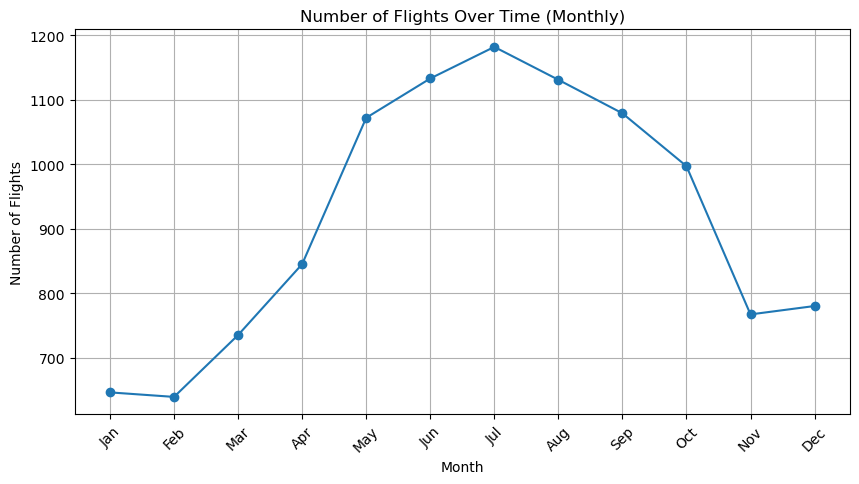

In [24]:
# Group by month and calculate the number of flights
monthly_flight = df.groupby('MONTH_NUM')['FLT_ERT_1'].count()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(monthly_flight.index, monthly_flight.values, marker='o', linestyle='-')

plt.title('Number of Flights Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)

plt.show()

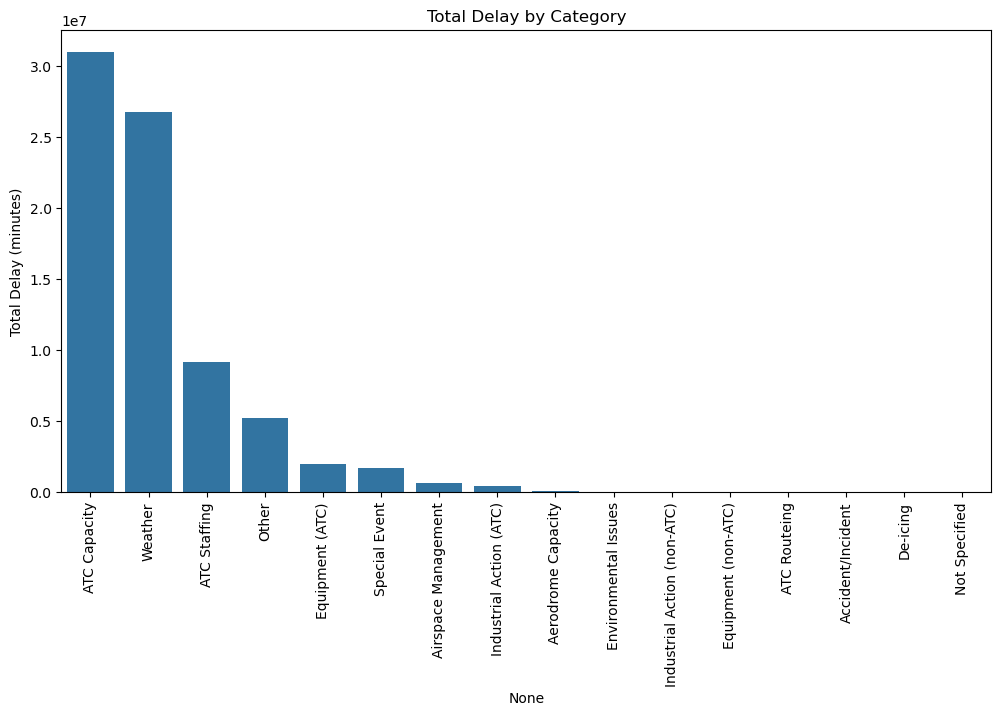

In [26]:
# Summarize delays by category
delay_sums = df[list(delay_categories.values())].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=delay_sums.index, y=delay_sums.values)
plt.xticks(rotation=90)
plt.title('Total Delay by Category')
plt.ylabel('Total Delay (minutes)')
plt.show()

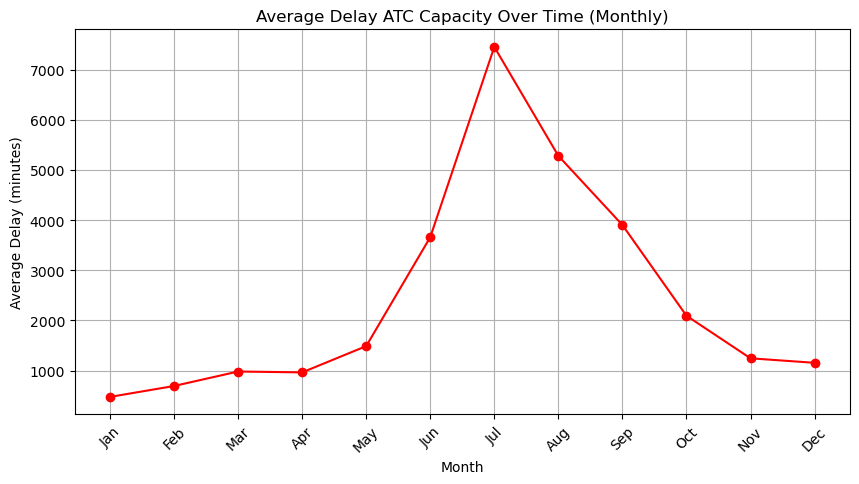

In [28]:
# Group by month and calculate the average delay (assuming 'OS+F' is the delay column)
monthly_delay_avg = df.groupby('MONTH_NUM')['ATC Capacity'].mean()  # Assuming 'OS+F' is the delay column

# Create a figure and plot the average delay
plt.figure(figsize=(10, 5))

# Plot average delay
plt.plot(monthly_delay_avg.index, monthly_delay_avg.values, marker='o', linestyle='-', color='r')

# Set title and labels
plt.title('Average Delay ATC Capacity Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')

# Set x-axis ticks for months
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.show()

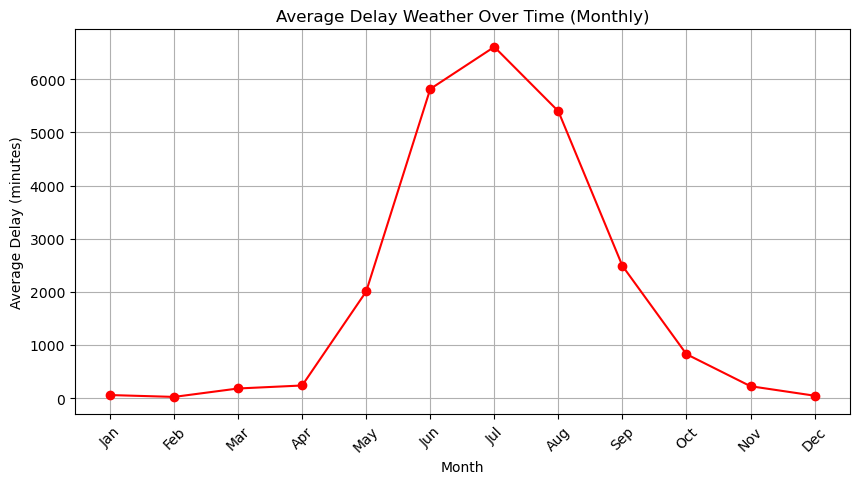

In [30]:
# Group by month and calculate the average delay (assuming 'OS+F' is the delay column)
monthly_delay_avg = df.groupby('MONTH_NUM')['Weather'].mean()  
# Create a figure and plot the average delay
plt.figure(figsize=(10, 5))

# Plot average delay
plt.plot(monthly_delay_avg.index, monthly_delay_avg.values, marker='o', linestyle='-', color='r')

# Set title and labels
plt.title('Average Delay Weather Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')

# Set x-axis ticks for months
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.show()

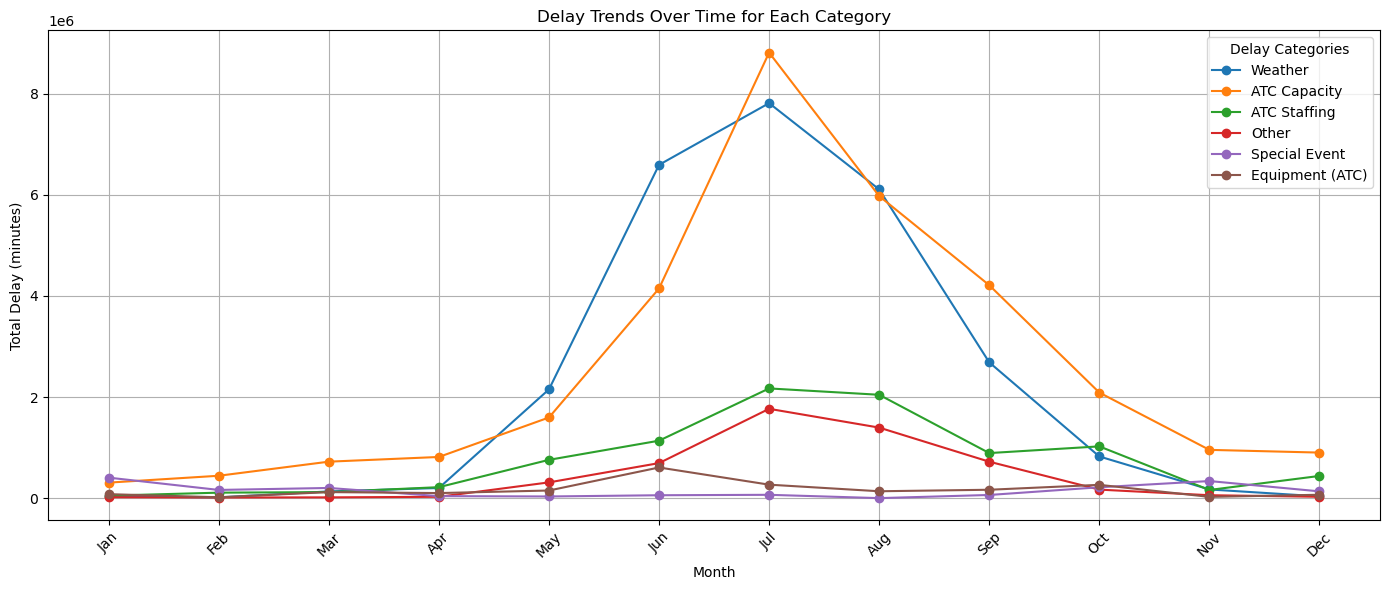

In [32]:
# Step 1: Group by 'MONTH_NUM' and sum the delays for each category (assuming each delay category is a column)
monthly_delay_sums = df.groupby('MONTH_NUM')[['Weather', 'ATC Capacity','ATC Staffing', 'Other', 'Special Event','Equipment (ATC)']].sum()

# Step 2: Plot each category's trend over time (each category will have its own line)
plt.figure(figsize=(14, 6))

# Plotting each category's line
for column in monthly_delay_sums.columns:
    plt.plot(monthly_delay_sums.index, monthly_delay_sums[column], label=column, marker='o')

# Step 3: Set the title and labels for the graph
plt.title('Delay Trends Over Time for Each Category')
plt.xlabel('Month')
plt.ylabel('Total Delay (minutes)')

# Set x-axis ticks for months
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Add a legend
plt.legend(title="Delay Categories")

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()



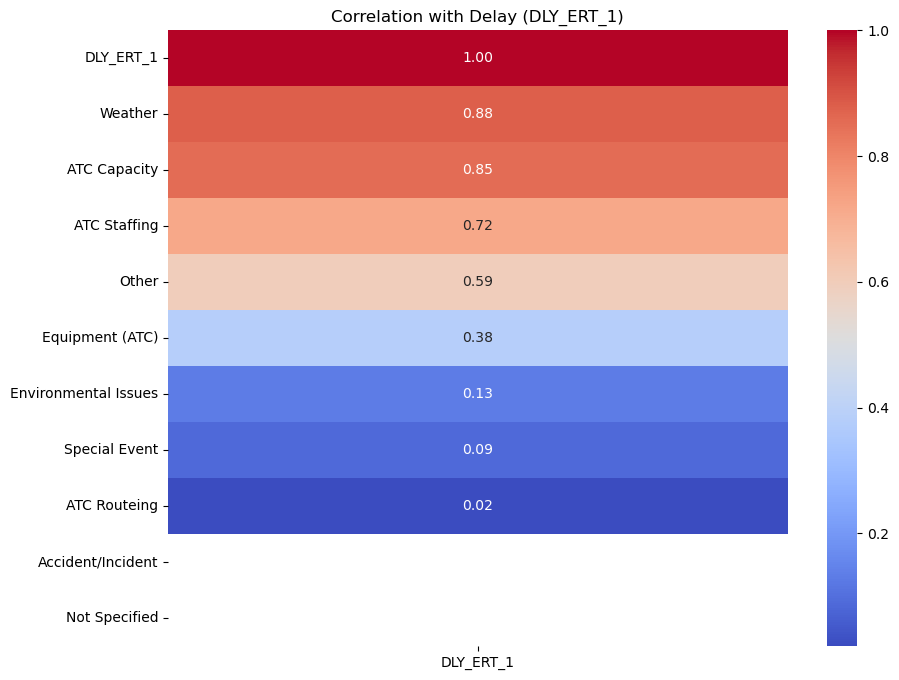

In [34]:
# Select only the specific numeric columns for correlation calculation
numeric_columns = ['Weather', 'ATC Capacity', 
                   'Other','Special Event', 'ATC Staffing', 
                   'Equipment (ATC)','DLY_ERT_1','Accident/Incident','ATC Routeing','Environmental Issues','Not Specified']

# Compute correlation matrix for the selected numeric columns
correlation_matrix = df[numeric_columns].corr()

# Now, use 'DLY_ERT_1' for the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['DLY_ERT_1']].sort_values(by='DLY_ERT_1', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Delay (DLY_ERT_1)")
plt.show()


In [110]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Define target variable and continuous features
target_variable = "DLY_ERT_1"  # Change this to your actual target column name
continuous_vars = ['Weather', 'ATC Capacity', 
                   'Other', 'Special Event', 
                   'ATC Staffing', 'Equipment (ATC)']

# Extract features and target
X = df[continuous_vars]
y = df[target_variable]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)  # Scaling training data
X_test_scaled = scaler.transform(X_test)  # Scaling test data

# Fit the OLS model on the scaled data
ols_model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()

# Print dataset size before and after processing
print(f"Original dataset size: {df.shape[0]}")

# Print the summary of the model
print(ols_model.summary())

# Predict on the test set
y_pred_ols = ols_model.predict(sm.add_constant(X_test_scaled))

# Model Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred_ols))
print("MSE:", mean_squared_error(y_test, y_pred_ols))
print("R² Score:", r2_score(y_test, y_pred_ols))



Original dataset size: 11006
                            OLS Regression Results                            
Dep. Variable:              DLY_ERT_1   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.650e+05
Date:                Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:53:30   Log-Likelihood:                -75546.
No. Observations:                8804   AIC:                         1.511e+05
Df Residuals:                    8797   BIC:                         1.512e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7085.1891  

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)


           Feature       VIF
0          Weather  1.713465
1     ATC Capacity  2.929104
2            Other  1.779442
3    Special Event  1.015852
4     ATC Staffing  2.035607
5  Equipment (ATC)  1.168353


In [114]:
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Define a range of alpha values to search
alphas = np.logspace(-3, 3, 50)  # 50 values between 0.001 and 1000

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data and transform the test data
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)  # Scale test data

# Ridge Regression with Cross-Validation
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)  # Fit on scaled training data
best_alpha_ridge = ridge_cv.alpha_

# Lasso Regression with Cross-Validation
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)  # Fit on scaled training data
best_alpha_lasso = lasso_cv.alpha_

# Print best lambda (alpha) values
print(f"Best alpha for Ridge: {best_alpha_ridge}")
print(f"Best alpha for Lasso: {best_alpha_lasso}")

# Predictions using best models
y_pred_ridge_best = ridge_cv.predict(X_test_scaled)  # Predict on scaled test data
y_pred_lasso_best = lasso_cv.predict(X_test_scaled)  # Predict on scaled test data

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")

# Evaluate Ridge and Lasso models
evaluate_model(y_test, y_pred_ridge_best, "Best Ridge Regression")
evaluate_model(y_test, y_pred_lasso_best, "Best Lasso Regression")


Best alpha for Ridge: 1.151395399326447
Best alpha for Lasso: 4.714866363457395

Best Ridge Regression Performance:
MAE: 145.7738
MSE: 248440.8090
R² Score: 0.9992

Best Lasso Regression Performance:
MAE: 146.5498
MSE: 248160.1691
R² Score: 0.9992


In [116]:
from sklearn.metrics import r2_score

r2_ridge = r2_score(y_test, y_pred_ridge_best)
r2_lasso = r2_score(y_test, y_pred_lasso_best)

print("R² Score (Ridge):", r2_ridge)
print("R² Score (Lasso):", r2_lasso)

R² Score (Ridge): 0.9991760301739063
R² Score (Lasso): 0.9991769609340204


In [118]:
# Add intercept to X_train and X_test for Ridge and Lasso
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# Ridge Regression with Cross-Validation
ridge_cv.fit(X_train_with_intercept, y_train)
best_alpha_ridge = ridge_cv.alpha_

# Lasso Regression with Cross-Validation
lasso_cv.fit(X_train_with_intercept, y_train)
best_alpha_lasso = lasso_cv.alpha_

# Extract the coefficients (including intercept) from Ridge and Lasso
ridge_best_coefs = ridge_cv.coef_
lasso_best_coefs = lasso_cv.coef_

feature_names = X_train.columns.tolist()

# Extract OLS Coefficients (including intercept)
ols_coefs = ols_model.params.values  # Include intercept
feature_names_with_intercept = ['Intercept'] + feature_names  # Add intercept to feature names

# Check lengths of the arrays to make sure they match
print("Ridge coefficients length:", len(ridge_best_coefs))
print("Lasso coefficients length:", len(lasso_best_coefs))
print("OLS coefficients length:", len(ols_coefs))
print("Feature names length:", len(feature_names_with_intercept))

# Create a DataFrame to compare coefficients
coef_df = pd.DataFrame({
    "Feature": feature_names_with_intercept,
    "Ridge Coef": ridge_best_coefs,
    "Lasso Coef": lasso_best_coefs,
    "OLS Coef": ols_coefs
})

# Display coefficients
print("\nComparison of Ridge, Lasso, and OLS Coefficients:")
print(coef_df)




Ridge coefficients length: 7
Lasso coefficients length: 7
OLS coefficients length: 7
Feature names length: 7

Comparison of Ridge, Lasso, and OLS Coefficients:
           Feature  Ridge Coef  Lasso Coef      OLS Coef
0        Intercept    0.000000    0.000000   7085.189119
1          Weather    1.003237    1.003343  11017.596020
2     ATC Capacity    1.005415    1.005531   7570.104992
3            Other    0.985582    0.985143   1972.218711
4    Special Event    1.067391    1.066380   1059.700014
5     ATC Staffing    1.023346    1.023228   3079.472832
6  Equipment (ATC)    1.034250    1.033714   1449.172333


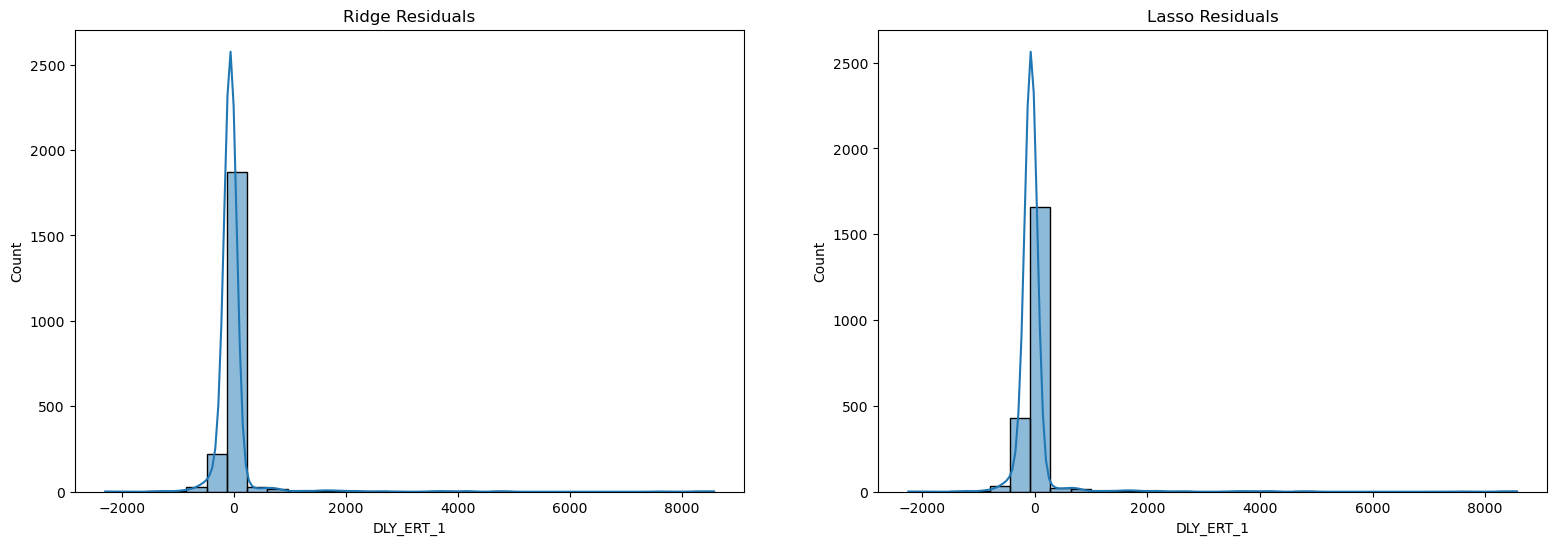

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals_ridge = y_test - y_pred_ridge_best
residuals_lasso = y_test - y_pred_lasso_best

plt.figure(figsize=(19, 6))

# Ridge Residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals_ridge, bins=30, kde=True)
plt.title("Ridge Residuals")

# Lasso Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals_lasso, bins=30, kde=True)
plt.title("Lasso Residuals")

plt.show()


In [122]:
# Model Evaluation
print("\nOLS Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_ols))
print("MSE:", mean_squared_error(y_test, y_pred_ols))
print("R² Score:", r2_score(y_test, y_pred_ols))

print("\nRidge Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge_best))
print("MSE:", mean_squared_error(y_test, y_pred_ridge_best))
print("R² Score (Ridge):", r2_score(y_test, y_pred_ridge_best))

print("\nLasso Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso_best))
print("MSE:", mean_squared_error(y_test, y_pred_lasso_best))
print("R² Score (Lasso):", r2_score(y_test, y_pred_lasso_best))



OLS Performance:
MAE: 145.6773056485779
MSE: 248312.89129121558
R² Score: 0.9991764544210874

Ridge Performance:
MAE: 145.77376182245052
MSE: 248440.8089764404
R² Score (Ridge): 0.9991760301739063

Lasso Performance:
MAE: 146.54977663017618
MSE: 248160.16909331857
R² Score (Lasso): 0.9991769609340204


In [124]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = ols_model.resid  # If using an OLS model from statsmodels

# Ensure X_train_scaled has a constant column
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_train_scaled_const)

# Extract p-value
_, p_value, _, _ = bp_test
print(f"Breusch-Pagan test p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Heteroscedasticity detected (variance of residuals is not constant).")
else:
    print("No significant heteroscedasticity detected (residual variance is constant).")



Breusch-Pagan test p-value: 0.3678
No significant heteroscedasticity detected (residual variance is constant).


In [126]:
from statsmodels.stats.diagnostic import linear_reset

# Run the Ramsey RESET test
reset_test = linear_reset(ols_model, power=2, use_f=True)

# Print the test results correctly
print(f"Ramsey RESET test p-value: {reset_test.pvalue:.4f}")

# Interpretation
if reset_test.pvalue < 0.05:
    print("Model likely suffers from non-linearity.")
else:
    print("No strong evidence of non-linearity.")



Ramsey RESET test p-value: 0.0000
Model likely suffers from non-linearity.


           Feature  Importance
0          Weather    0.687831
1     ATC Capacity    0.275941
4     ATC Staffing    0.024966
2            Other    0.004526
5  Equipment (ATC)    0.003409
3    Special Event    0.003328


/var/folders/yv/41mdqm053n5dk0wgdc_l196m0000gn/T/ipykernel_95065/2456740179.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")


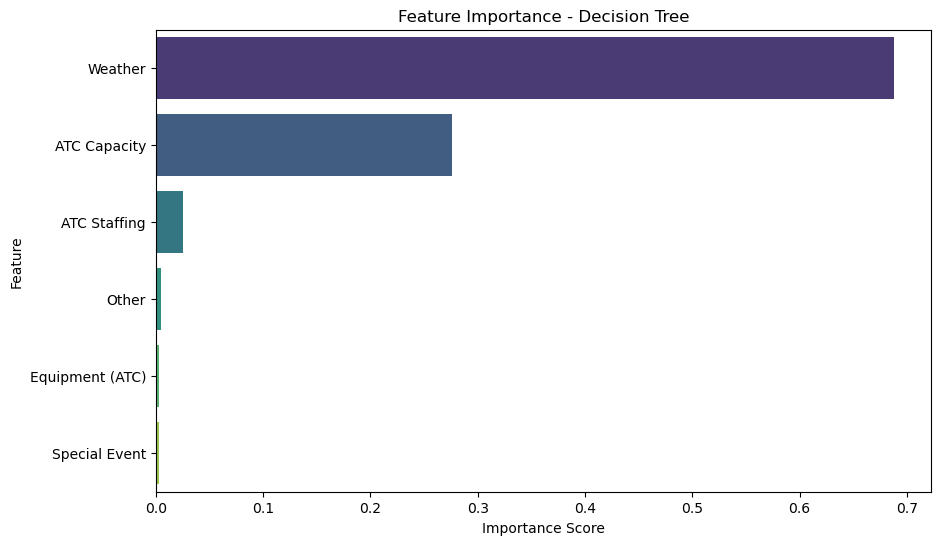

In [170]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Select your features and target variable
X = df[['Weather', 'ATC Capacity', 
                   'Other','Special Event', 'ATC Staffing', 
                   'Equipment (ATC)']]  # Features
y = df['DLY_ERT_1']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to view the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Decision Tree")
plt.show()


           Feature  Importance
0          Weather    0.685644
1     ATC Capacity    0.276715
4     ATC Staffing    0.021904
2            Other    0.005843
3    Special Event    0.005170
5  Equipment (ATC)    0.004723


/var/folders/yv/41mdqm053n5dk0wgdc_l196m0000gn/T/ipykernel_95065/3820753084.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")


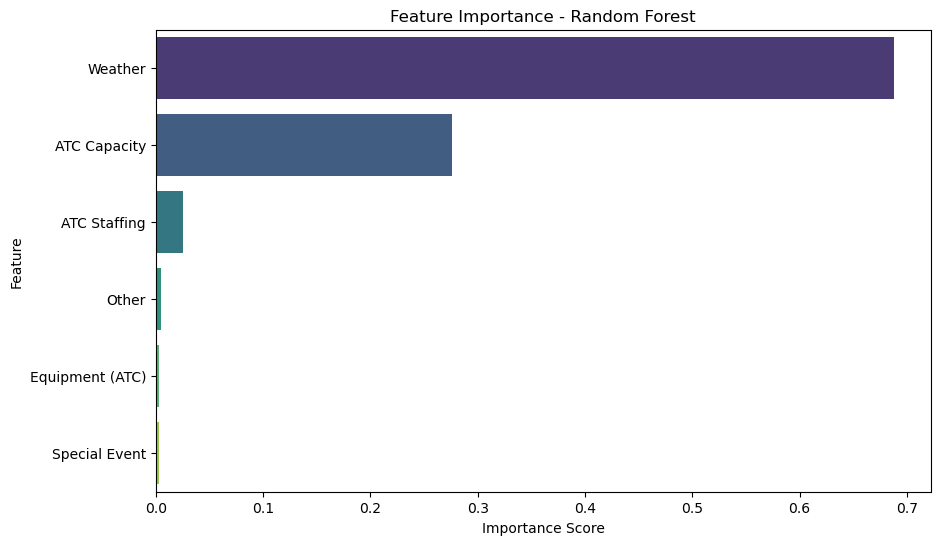

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Select your features and target variable
X = df[['Weather', 'ATC Capacity', 
        'Other','Special Event', 'ATC Staffing', 
        'Equipment (ATC)']]   # Features
y = df['DLY_ERT_1']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_feature_importances = rf_model.feature_importances_

# Create a DataFrame to view the feature importance
rf_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_feature_importances
})

# Sort the features by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

print(rf_feature_importance_df) 

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.show()


In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions for Decision Tree
dt_preds = model.predict(X_test)

# Predictions for Random Forest
rf_preds = rf_model.predict(X_test)

# Calculate metrics
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)  # Define MSE
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"  - R² Score: {r2:.4f}")
    print(f"  - MSE: {mse:.4f}")
    print(f"  - MAE: {mae:.4f}")
    print("-" * 40)
    
    return r2, mse, mae  

# Compare models
dt_results = evaluate_model(y_test, dt_preds, "Decision Tree")
rf_results = evaluate_model(y_test, rf_preds, "Random Forest")


Decision Tree Performance:
  - R² Score: 0.9700
  - MSE: 9048081.5790
  - MAE: 704.6254
----------------------------------------
Random Forest Performance:
  - R² Score: 0.9884
  - MSE: 3512554.8175
  - MAE: 435.5531
----------------------------------------


In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming `df` is your original DataFrame
target_variable = "DLY_ERT_1"  # Change this to your actual target column name
continuous_vars = ['Weather', 'ATC Capacity', 
                   'Other', 'Special Event', 
                   'ATC Staffing', 'Equipment (ATC)']
# Features and target
X = df[continuous_vars]
y = df[target_variable]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Hyperparameter tuning with GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search_rf.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

# Fit the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Model Evaluation for Random Forest
print("Random Forest Performance with GridSearchCV:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Performance with GridSearchCV:
MAE: 474.7267409540275
MSE: 4858796.319421044
R² Score: 0.986370430646217


Feature Importance from Random Forest GridSearchCV:
           Feature  Importance
0          Weather    0.692560
1     ATC Capacity    0.267670
4     ATC Staffing    0.022756
5  Equipment (ATC)    0.006714
2            Other    0.005676
3    Special Event    0.004625


/var/folders/yv/41mdqm053n5dk0wgdc_l196m0000gn/T/ipykernel_95065/4208517090.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")


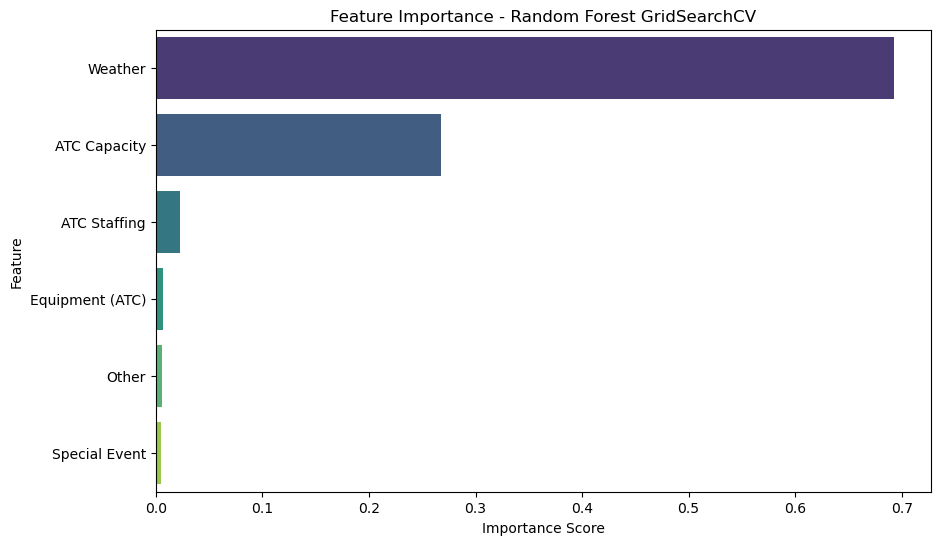

In [136]:
# Get feature importance
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the results
print("Feature Importance from Random Forest GridSearchCV:")
print(feature_importance_df)

# Optional: Plot the feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest GridSearchCV")
plt.show()


In [138]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming `df` is your original DataFrame
target_variable = "DLY_ERT_1"  # Change this to your actual target column name
continuous_vars = ['Weather', 'ATC Capacity', 
                   'Other', 'Special Event', 
                   'ATC Staffing', 'Equipment (ATC)']

# Features and target
X = df[continuous_vars]
y = df[target_variable]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Hyperparameter Grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 6, 10],  # Maximum depth of tree
    'subsample': [0.8, 1.0],  # Fraction of samples used in each boosting round
    'colsample_bytree': [0.8, 1.0]  # Fraction of features used per tree
}

# Hyperparameter tuning with GridSearchCV
xg_model = xgb.XGBRegressor(random_state=42)
grid_search_xgb = GridSearchCV(estimator=xg_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best parameters for XGBoost: {best_params_xgb}")

# Fit the best XGBoost model
best_xg_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xg_model.predict(X_test_scaled)

# Model Evaluation for XGBoost
print("XGBoost Performance GridSearchCV:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
XGBoost Performance GridSearchCV:
MAE: 455.98054330873174
MSE: 5309865.631651716
R² Score: 0.9851051212835179


Feature Importance (GridSearchCV):
           Feature  Importance
0          Weather    0.527660
1     ATC Capacity    0.302659
4     ATC Staffing    0.090311
2            Other    0.046832
5  Equipment (ATC)    0.021813
3    Special Event    0.010725


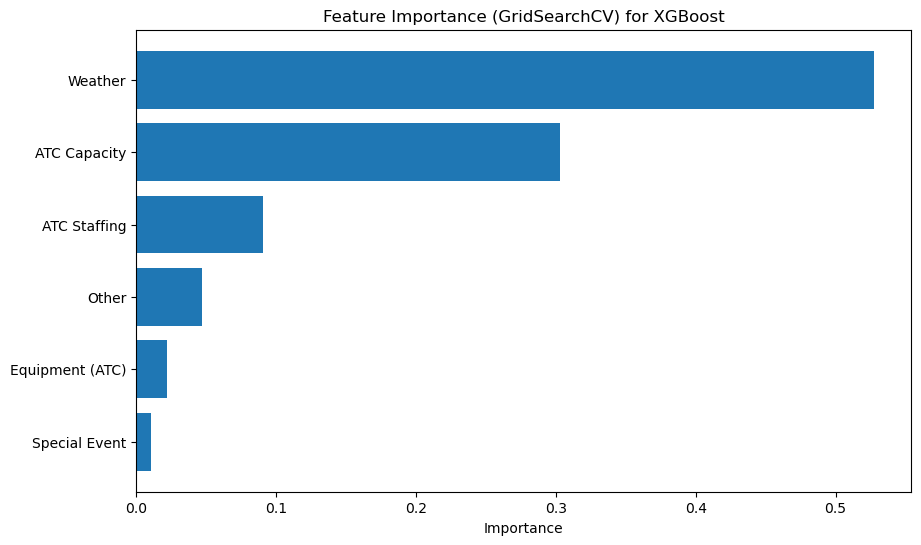

In [140]:
# Get feature importance scores for the best XGBoost model
feature_importance_xgb_gridsearch = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xg_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature Importance (GridSearchCV):")
print(feature_importance_xgb_gridsearch)

# Optionally, plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_xgb_gridsearch['Feature'], feature_importance_xgb_gridsearch['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (GridSearchCV) for XGBoost')
plt.gca().invert_yaxis()
plt.show()




Best parameters (L1 & L2 regularization): {'reg_alpha': 10, 'reg_lambda': 10}
Model Performance:
MAE: 460.4166288895568
MSE: 5562304.052095581
R² Score: 0.981552263006358
           Feature  Importance
0          Weather    0.551167
1     ATC Capacity    0.310062
4     ATC Staffing    0.082748
2            Other    0.028707
5  Equipment (ATC)    0.017694
3    Special Event    0.009622


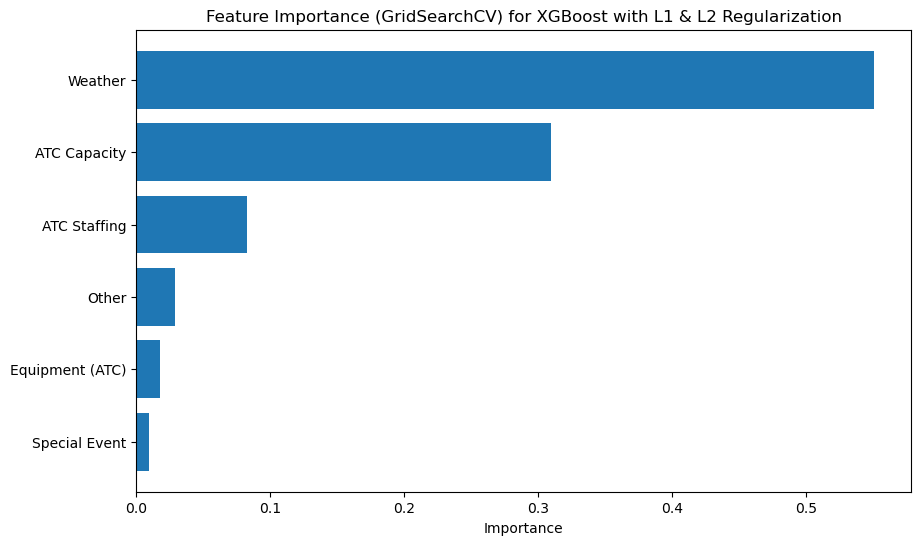

In [172]:
from sklearn.model_selection import GridSearchCV

# XGBoost model setup with Ridge and Lasso regularization
xgb_model__L1_L1 =xgb.XGBRegressor(
    n_estimators=200,   # Number of trees
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    max_depth=6,        # Limits tree depth
    subsample=0.8,      # Uses 80% of training data per tree
    colsample_bytree=0.8,  # Uses 80% of features per tree
    random_state=42
)

# Hyperparameter grid for Lasso (reg_alpha) and Ridge (reg_lambda)
param_grid = {
    'reg_alpha': [0.01, 0.1, 1.0, 10],  # L1 regularization strength
    'reg_lambda': [0.01, 0.1, 1.0, 10], # L2 regularization strength
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model__L1_L1, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best parameters (L1 & L2 regularization): {best_params}")

# Fit the best model
best_xgb_model__L1_L1 = grid_search.best_estimator_
y_pred = best_xgb_model__L1_L1.predict(X_test)

# Evaluate the model
print("Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Feature importance from the best model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb_model__L1_L1.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (GridSearchCV) for XGBoost with L1 & L2 Regularization')
plt.gca().invert_yaxis()
plt.show()


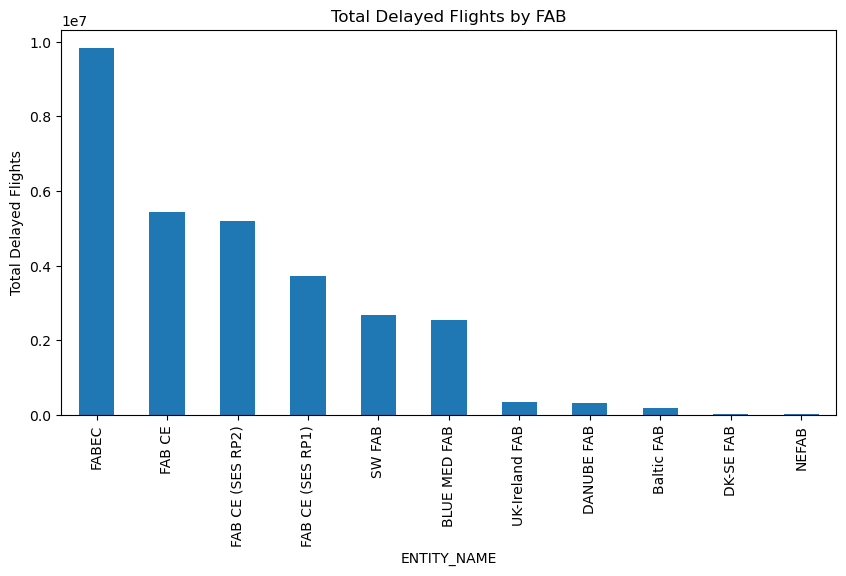

In [144]:
# FAB Analysis
delay_by_fab = df[df['ENTITY_TYPE'] == 'FAB (FIR)'].groupby('ENTITY_NAME')['DLY_ERT_1'].sum().sort_values(ascending=False)
delay_by_fab.plot(kind='bar', figsize=(10,5), title='Total Delayed Flights by FAB')
plt.ylabel('Total Delayed Flights')
plt.show()

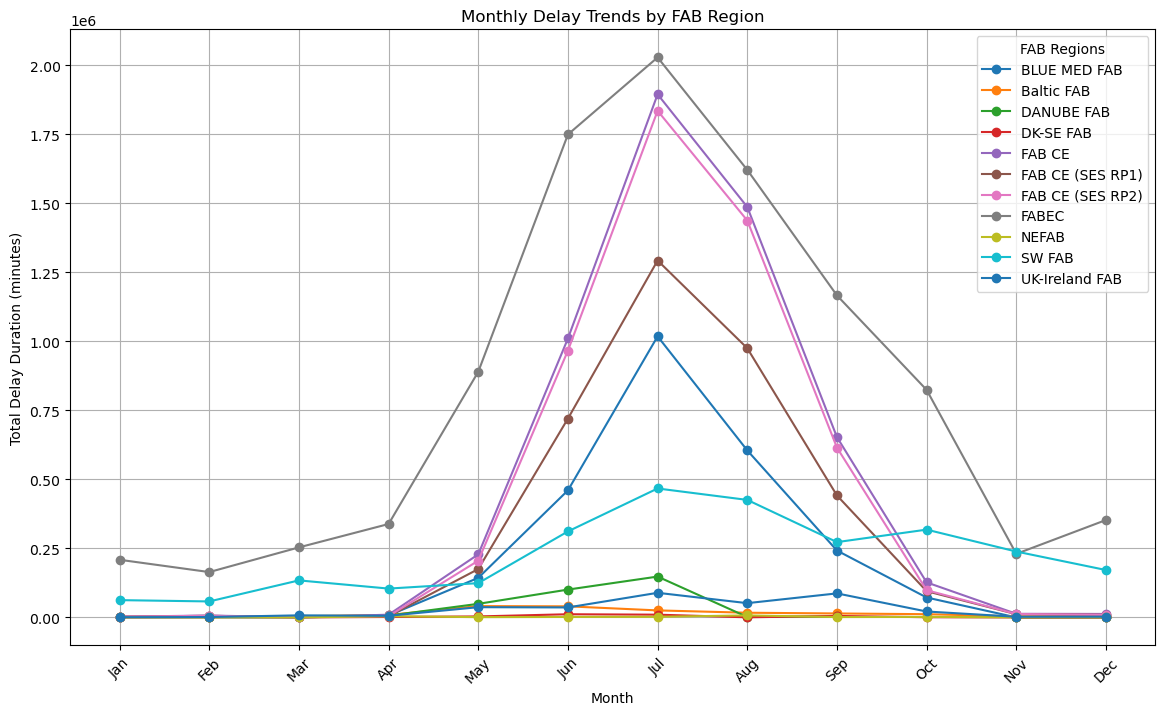

In [146]:
import matplotlib.pyplot as plt

# Group the data by FAB and month and sum the delays
fab_monthly_delays = df[df['ENTITY_TYPE'] == 'FAB (FIR)'].groupby(['ENTITY_NAME', 'MONTH_NUM'])['DLY_ERT_1'].sum().unstack()

# Plot the delay trends for each FAB region across months
plt.figure(figsize=(14, 8))

# Plot each FAB's delay trend over the months
for fab in fab_monthly_delays.index:
    plt.plot(fab_monthly_delays.columns, fab_monthly_delays.loc[fab], marker='o', label=fab)

# Customize the plot
plt.title('Monthly Delay Trends by FAB Region')
plt.xlabel('Month')
plt.ylabel('Total Delay Duration (minutes)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='FAB Regions')
plt.grid(True)

# Show the plot
plt.show()


In [148]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Define the delay categories as features
delay_columns = ['Weather', 'ATC Capacity', 
        'Other','Special Event', 'ATC Staffing', 
        'Equipment (ATC)']

# Group the data by FAB and get total delays
delay_by_fab = df[df['ENTITY_TYPE'] == 'FAB (FIR)'].groupby('ENTITY_NAME')[delay_columns].sum()

# Initialize an empty dictionary to store the most important delay category for each FAB
most_important_category = {}

# Loop over each FAB and train a decision tree model
for fab in delay_by_fab.index:
    fab_data = df[df['ENTITY_NAME'] == fab]
    
    # Features (delay categories) and target (total delay for this FAB)
    X = fab_data[delay_columns]
    y = fab_data['DLY_ERT_1']  # Assuming 'DLY_ERT_1' is the delay variable
    
    # Train-test split for each FAB
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a decision tree regressor
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Get feature importances and determine the most important category
    feature_importances = model.feature_importances_
    
    # Get the index of the most important feature
    most_important_index = feature_importances.argmax()
    
    # Get the name of the most important delay category for this FAB
    most_important_category[fab] = delay_columns[most_important_index]

# Print the most important delay category for each FAB
for fab, category in most_important_category.items():
    print(f"Most important delay category for {fab}: {category}")


Most important delay category for BLUE MED FAB: Weather
Most important delay category for Baltic FAB: ATC Staffing
Most important delay category for DANUBE FAB: Weather
Most important delay category for DK-SE FAB: ATC Staffing
Most important delay category for FAB CE: Weather
Most important delay category for FAB CE (SES RP1): Weather
Most important delay category for FAB CE (SES RP2): Weather
Most important delay category for FABEC: Weather
Most important delay category for NEFAB: Equipment (ATC)
Most important delay category for SW FAB: ATC Capacity
Most important delay category for UK-Ireland FAB: Weather


In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store the most important delay category for each FAB
most_important_category = {}
r2_scores = {}
mae_scores = {}
mse_scores = {}
rmse_scores = {}

# Loop over each FAB and train a decision tree model
for fab in delay_by_fab.index:
    fab_data = df[df['ENTITY_NAME'] == fab]
    
    # Features (delay categories) and target (total delay for this FAB)
    X = fab_data[delay_columns]
    y = fab_data['DLY_ERT_1']  # Assuming 'DLY_ERT_1' is the delay variable
    
    # Train-test split for each FAB
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a decision tree regressor
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    r2_scores[fab] = r2_score(y_test, y_pred)
    mae_scores[fab] = mean_absolute_error(y_test, y_pred)
    mse_scores[fab] = mean_squared_error(y_test, y_pred)
    rmse_scores[fab] = mean_squared_error(y_test, y_pred, squared=False)
    
    # Get feature importances and determine the most important category
    feature_importances = model.feature_importances_
    
    # Get the index of the most important feature
    most_important_index = feature_importances.argmax()
    
    # Get the name of the most important delay category for this FAB
    most_important_category[fab] = delay_columns[most_important_index]


# Print evaluation metrics
print("\nEvaluation Metrics for Each FAB Decision Tree:")
for fab in r2_scores:
    print(f"\n{fab}:")
    print(f"  R² Score DT: {r2_scores[fab]:.2f}")
    print(f"  MAE DT: {mae_scores[fab]:.2f}")
    print(f"  MSE DT: {mse_scores[fab]:.2f}")
   
    
   


Evaluation Metrics for Each FAB Decision Tree:

BLUE MED FAB:
  R² Score DT: 0.76
  MAE DT: 2653.77
  MSE DT: 61605018.99

Baltic FAB:
  R² Score DT: 0.68
  MAE DT: 169.79
  MSE DT: 326136.13

DANUBE FAB:
  R² Score DT: 0.98
  MAE DT: 482.29
  MSE DT: 773749.86

DK-SE FAB:
  R² Score DT: 0.88
  MAE DT: 66.23
  MSE DT: 33343.70

FAB CE:
  R² Score DT: 0.97
  MAE DT: 2153.35
  MSE DT: 14052984.67

FAB CE (SES RP1):
  R² Score DT: 0.87
  MAE DT: 2932.12
  MSE DT: 39208770.95

FAB CE (SES RP2):
  R² Score DT: 0.94
  MAE DT: 2939.98
  MSE DT: 36641532.05

FABEC:
  R² Score DT: 0.88
  MAE DT: 4592.50
  MSE DT: 85074238.80

NEFAB:
  R² Score DT: 0.93
  MAE DT: 19.46
  MSE DT: 741.47

SW FAB:
  R² Score DT: 0.96
  MAE DT: 664.45
  MSE DT: 1476197.31

UK-Ireland FAB:
  R² Score DT: 0.94
  MAE DT: 108.83
  MSE DT: 210105.28


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

In [152]:
import pandas as pd

# Create a DataFrame to store evaluation metrics
eval_metrics_df_DT = pd.DataFrame({
    'FAB': list(r2_scores.keys()),
    'R² Score DT': list(r2_scores.values()),
    'MAE DT': list(mae_scores.values()),
    'MSE DT': list(mse_scores.values()),
    'Most Important Delay Category Decision Tree': list(most_important_category.values())
})

# Display the table

print(eval_metrics_df_DT)

                 FAB  R² Score DT       MAE DT        MSE DT  \
0       BLUE MED FAB     0.756094  2653.767505  6.160502e+07   
1         Baltic FAB     0.678695   169.792390  3.261361e+05   
2         DANUBE FAB     0.980511   482.285714  7.737499e+05   
3          DK-SE FAB     0.877940    66.233333  3.334370e+04   
4             FAB CE     0.971047  2153.352459  1.405298e+07   
5   FAB CE (SES RP1)     0.870081  2932.125000  3.920877e+07   
6   FAB CE (SES RP2)     0.937755  2939.982143  3.664153e+07   
7              FABEC     0.884474  4592.500000  8.507424e+07   
8              NEFAB     0.927634    19.463511  7.414687e+02   
9             SW FAB     0.956978   664.445946  1.476197e+06   
10    UK-Ireland FAB     0.936362   108.830986  2.101053e+05   

   Most Important Delay Category Decision Tree  
0                                      Weather  
1                                 ATC Staffing  
2                                      Weather  
3                                 A

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize dictionaries for storing evaluation metrics
r2_scores_RF = {}
mae_scores_RF = {}
mse_scores_RF = {}
rmse_scores_RF = {}
most_important_category_RF = {}
# Loop over each FAB and train a Random Forest model
for fab in delay_by_fab.index:
    fab_data = df[df['ENTITY_NAME'] == fab]
    
    # Features (delay categories) and target (total delay for this FAB)
    X = fab_data[delay_columns]
    y = fab_data['DLY_ERT_1']  # Assuming 'DLY_ERT_1' is the delay variable
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Compute residuals
    residuals = y_test - y_pred
    
    # Store evaluation metrics
    r2_scores_RF[fab] = r2_score(y_test, y_pred)
    mae_scores_RF[fab] = mean_absolute_error(y_test, y_pred)
    mse_scores_RF[fab] = mean_squared_error(y_test, y_pred)
    rmse_scores_RF[fab] = mean_squared_error(y_test, y_pred, squared=False)
    
    # Get feature importances and determine the most important category
    feature_importances = model.feature_importances_
    most_important_index = feature_importances.argmax()
    most_important_category_RF[fab] = delay_columns[most_important_index]
    
    # Print evaluation metrics
print("\nEvaluation Metrics for Each FAB Random Forest:")
for fab in r2_scores:
    print(f"\n{fab}:")
    print(f"  R² Score DT: {r2_scores[fab]:.2f}")
    print(f"  MAE DT: {mae_scores[fab]:.2f}")
    print(f"  MSE DT: {mse_scores[fab]:.2f}")
 
    
   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 


Evaluation Metrics for Each FAB Random Forest:

BLUE MED FAB:
  R² Score DT: 0.76
  MAE DT: 2653.77
  MSE DT: 61605018.99

Baltic FAB:
  R² Score DT: 0.68
  MAE DT: 169.79
  MSE DT: 326136.13

DANUBE FAB:
  R² Score DT: 0.98
  MAE DT: 482.29
  MSE DT: 773749.86

DK-SE FAB:
  R² Score DT: 0.88
  MAE DT: 66.23
  MSE DT: 33343.70

FAB CE:
  R² Score DT: 0.97
  MAE DT: 2153.35
  MSE DT: 14052984.67

FAB CE (SES RP1):
  R² Score DT: 0.87
  MAE DT: 2932.12
  MSE DT: 39208770.95

FAB CE (SES RP2):
  R² Score DT: 0.94
  MAE DT: 2939.98
  MSE DT: 36641532.05

FABEC:
  R² Score DT: 0.88
  MAE DT: 4592.50
  MSE DT: 85074238.80

NEFAB:
  R² Score DT: 0.93
  MAE DT: 19.46
  MSE DT: 741.47

SW FAB:
  R² Score DT: 0.96
  MAE DT: 664.45
  MSE DT: 1476197.31

UK-Ireland FAB:
  R² Score DT: 0.94
  MAE DT: 108.83
  MSE DT: 210105.28


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

In [156]:


# Create a DataFrame to store evaluation metrics
eval_metrics_df_RF = pd.DataFrame({
    'FAB': list(r2_scores_RF.keys()),
    'R² Score': list(r2_scores_RF.values()),
    'MAE': list(mae_scores_RF.values()),
    'MSE': list(mse_scores_RF.values()),
    'Most Important Delay Category Random Forest': list(most_important_category_RF.values())
})

# Display the table
print(eval_metrics_df_RF)


                 FAB  R² Score          MAE           MSE  \
0       BLUE MED FAB  0.866735  1871.754680  3.365952e+07   
1         Baltic FAB  0.697939   123.156153  3.066022e+05   
2         DANUBE FAB  0.985435   390.483571  5.782674e+05   
3          DK-SE FAB  0.934226    53.004000  1.796764e+04   
4             FAB CE  0.991148  1188.124717  4.296391e+06   
5   FAB CE (SES RP1)  0.939292  1847.179643  1.832118e+07   
6   FAB CE (SES RP2)  0.942357  2720.308036  3.393265e+07   
7              FABEC  0.917369  3126.590270  6.084980e+07   
8              NEFAB  0.933773    18.251798  6.785750e+02   
9             SW FAB  0.973371   453.884324  9.136945e+05   
10    UK-Ireland FAB  0.919803   125.169918  2.647738e+05   

   Most Important Delay Category Random Forest  
0                                      Weather  
1                                 ATC Staffing  
2                                      Weather  
3                                 ATC Staffing  
4                     

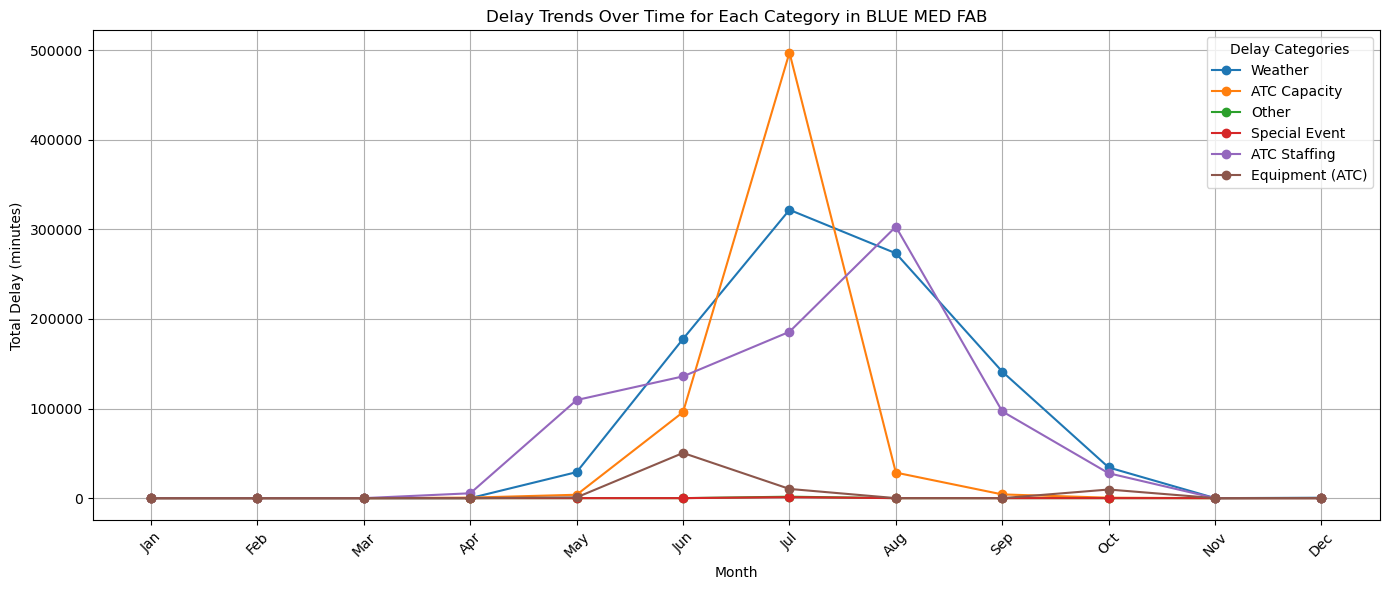

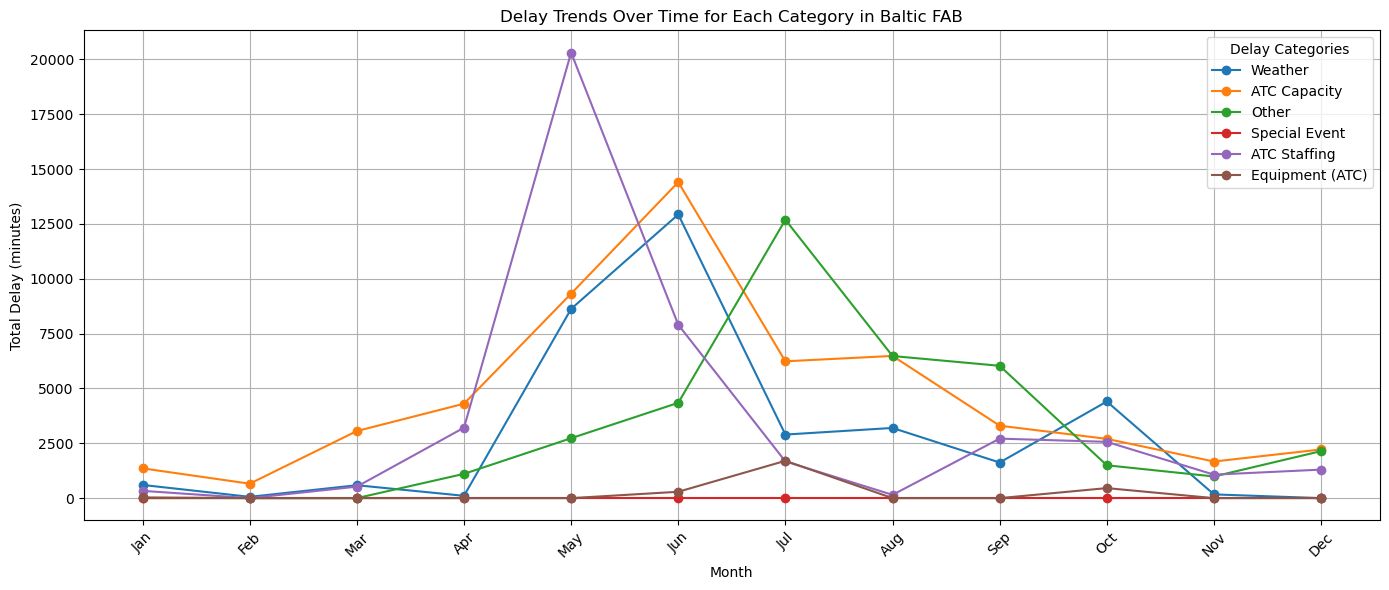

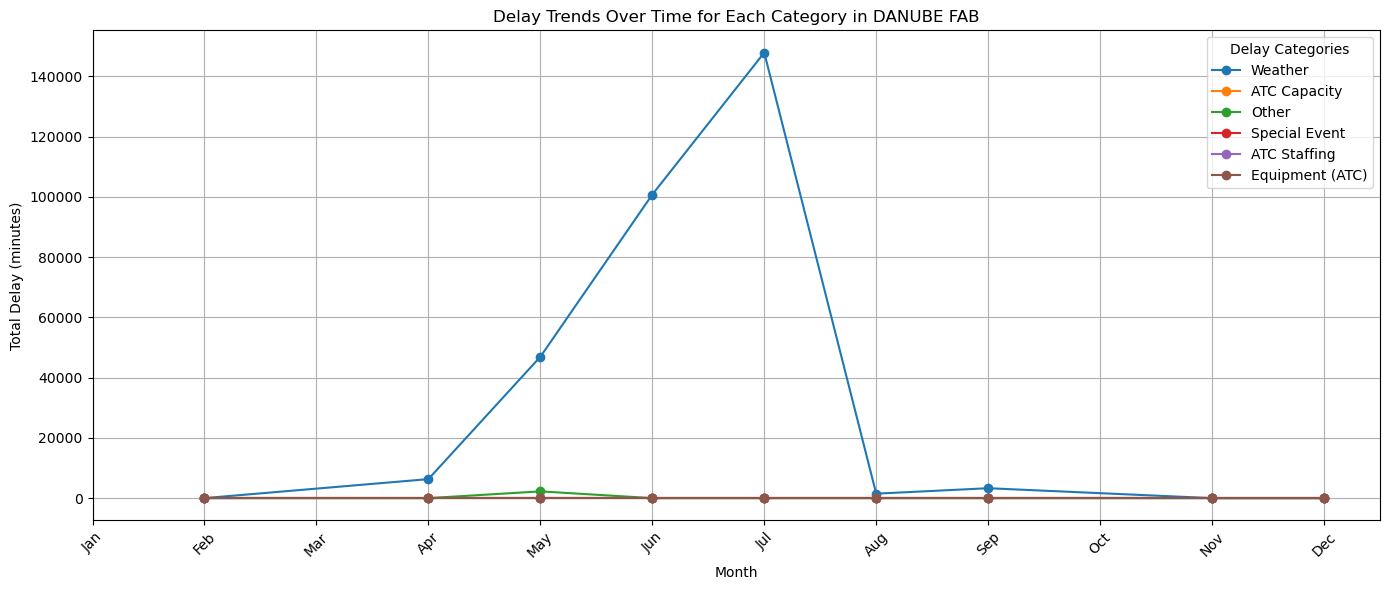

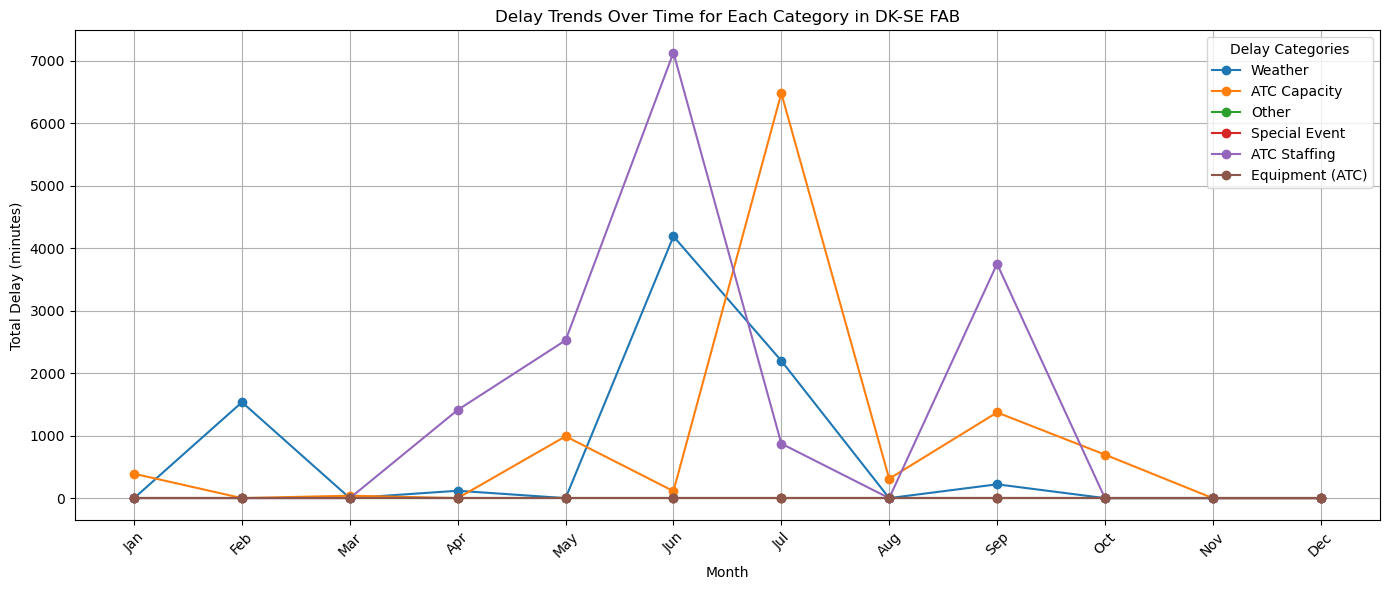

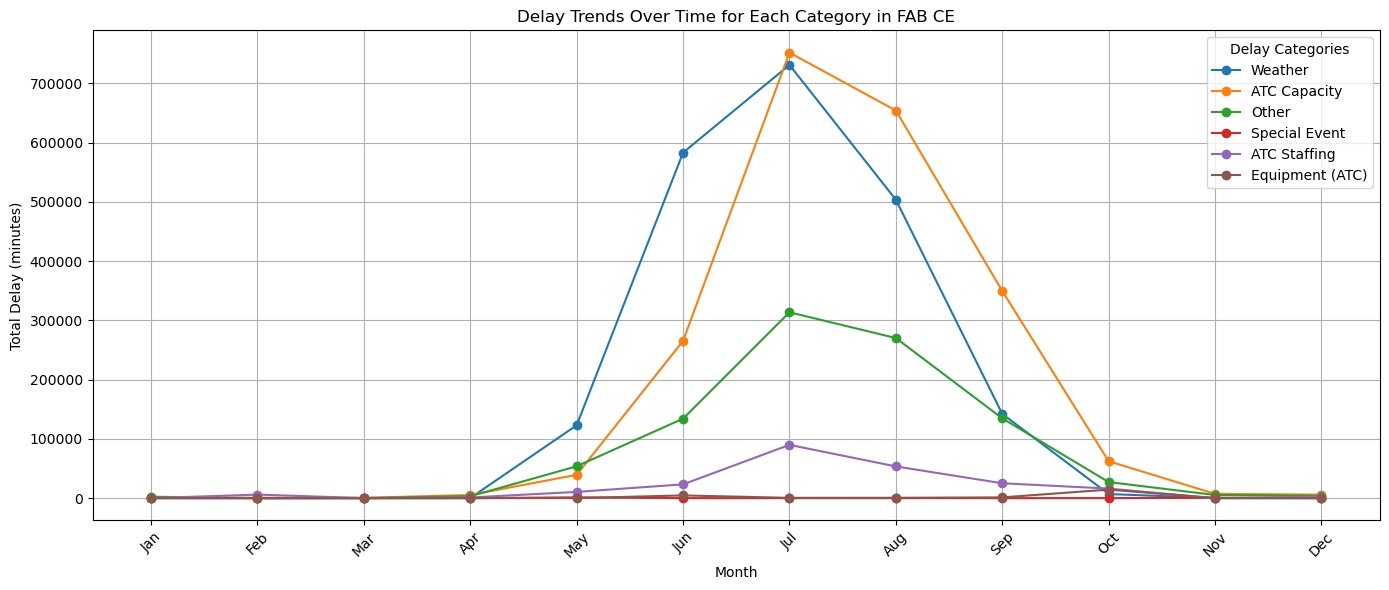

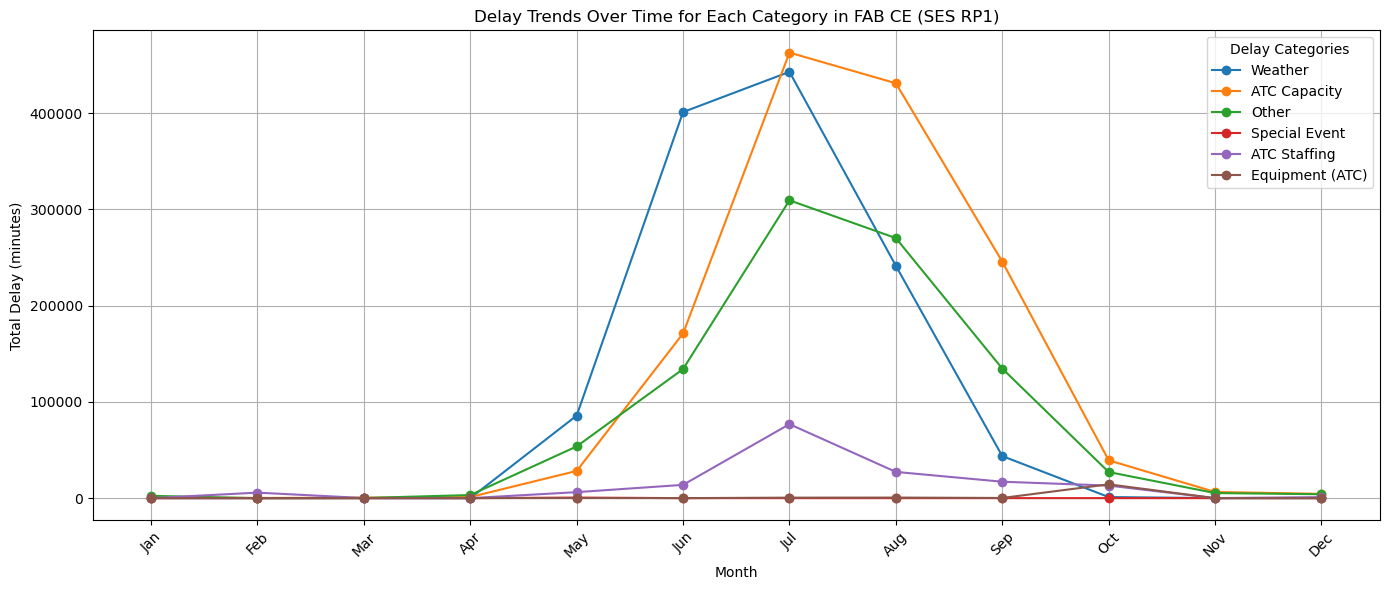

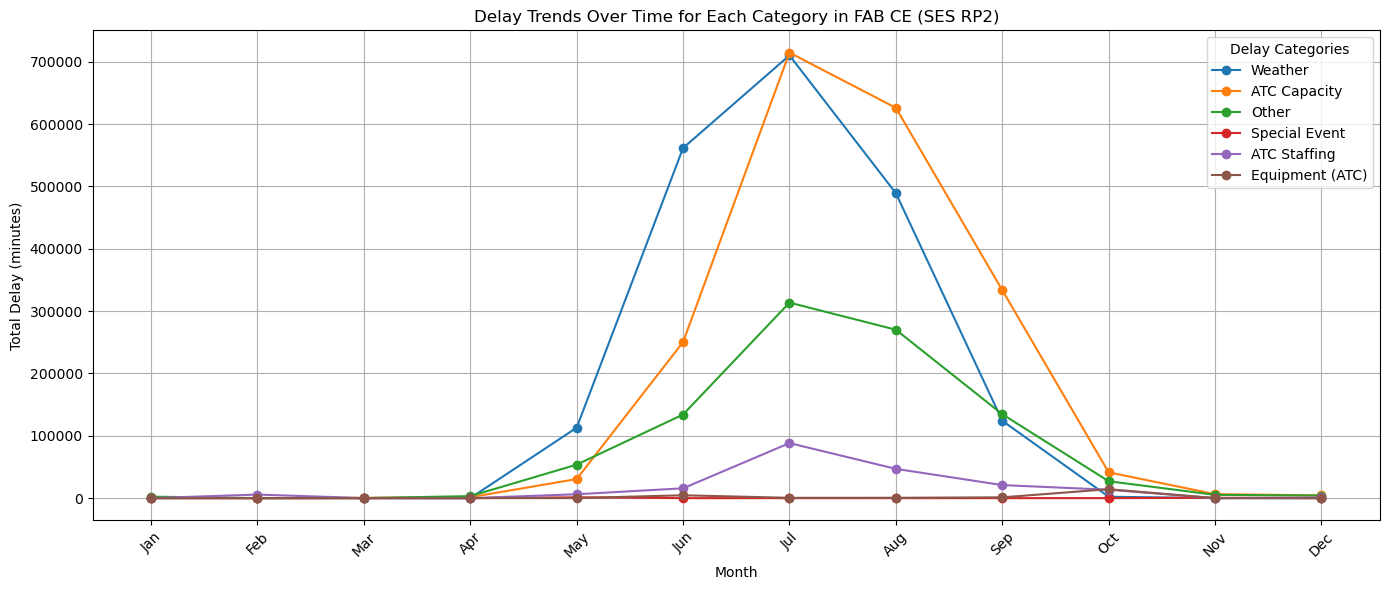

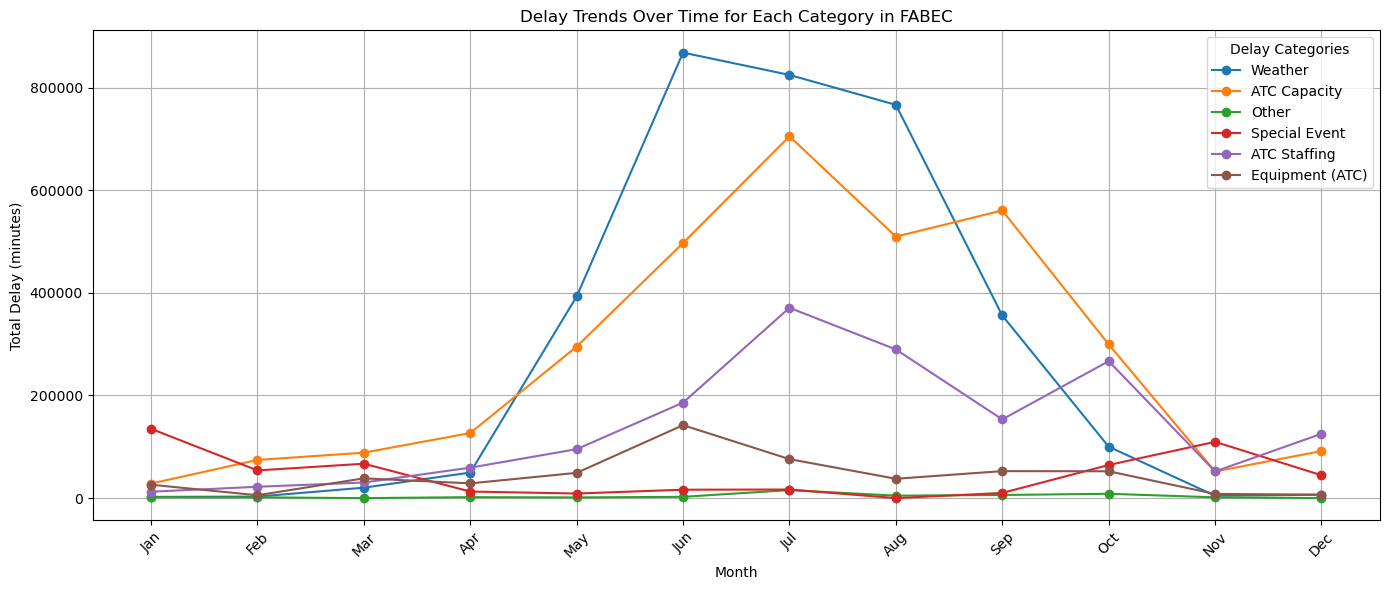

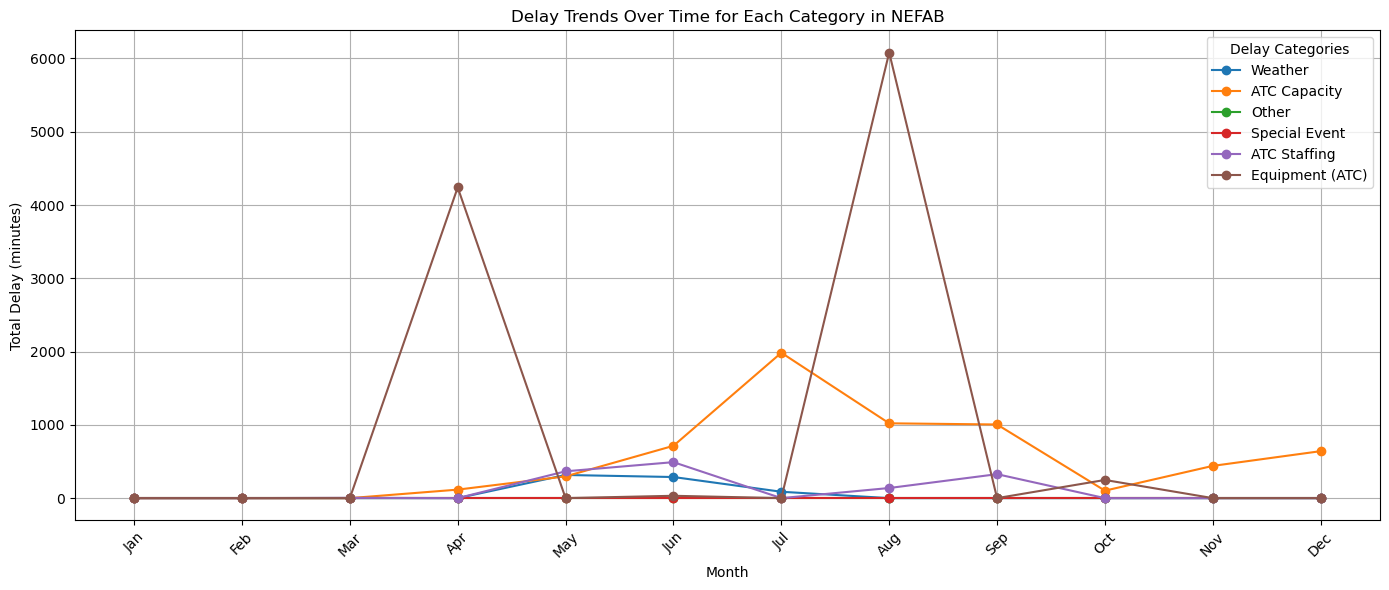

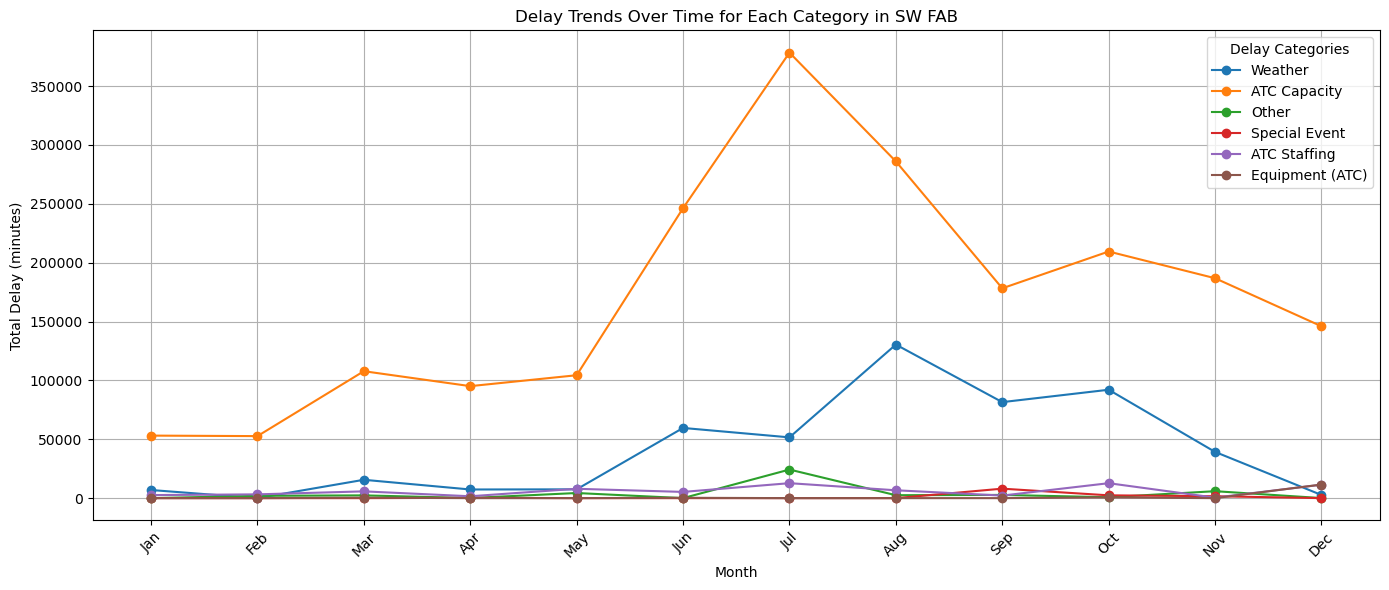

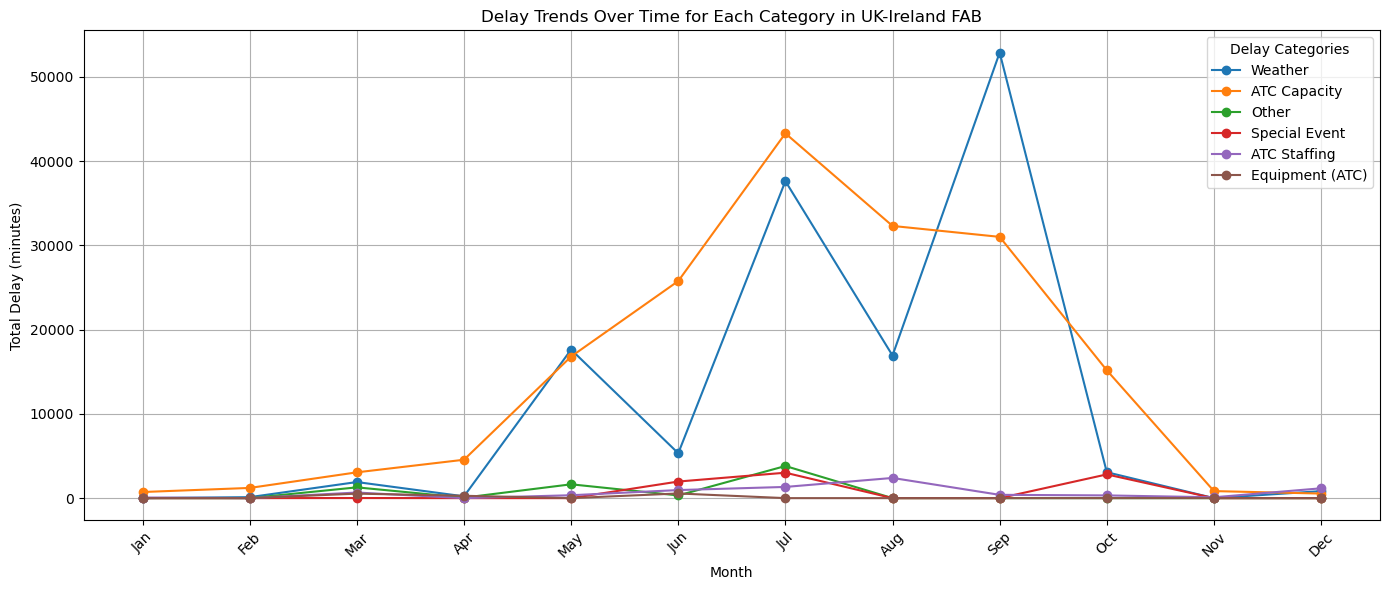

In [158]:
# List of FABs to plot
fabs = ['BLUE MED FAB', 'Baltic FAB', 'DANUBE FAB', 'DK-SE FAB', 
        'FAB CE', 'FAB CE (SES RP1)', 'FAB CE (SES RP2)', 'FABEC', 
        'NEFAB', 'SW FAB', 'UK-Ireland FAB']

# List of delay categories to plot
delay_categories = ['Weather', 'ATC Capacity', 
        'Other','Special Event', 'ATC Staffing', 
        'Equipment (ATC)']

# Loop over each FAB to plot the trends for each delay category
for fab in fabs:
    # Filter data for the current FAB
    fab_data = df[df['ENTITY_NAME'] == fab]

    # Group by 'MONTH_NUM' and sum the delays for each category
    monthly_delay_sums = fab_data.groupby('MONTH_NUM')[delay_categories].sum()

    # Create the plot for each FAB
    plt.figure(figsize=(14, 6))

    # Plot each delay category's trend
    for column in monthly_delay_sums.columns:
        plt.plot(monthly_delay_sums.index, monthly_delay_sums[column], label=column, marker='o')

    # Set the title and labels
    plt.title(f'Delay Trends Over Time for Each Category in {fab}')
    plt.xlabel('Month')
    plt.ylabel('Total Delay (minutes)')

    # Set x-axis ticks for months
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

    # Add a legend
    plt.legend(title="Delay Categories")

    # Show grid and plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [160]:
#FABEC -  Belgium, France, Germany, Luxembourg, the Netherlands and Switzerland.
#SW FAB - FIR Lisboa; UIR Madrid; UIR Barcelona; UIR Canarias.
#FAB CE - Austria, Bosnia & Herzegovina, Croatia, Czech Republic, Hungary, Slovakia and Slovenia 
#FAB CE (SES RP1) - 

In [162]:
import numpy as np

# Set "High Delay" as the top 25% of delay values
threshold = np.percentile(df['DLY_ERT_1'], 75)

# Create classification labels
df['Delay_Category'] = df['DLY_ERT_1'].apply(lambda x: 'High' if x > threshold else 'Low')

print(f"New threshold for High Delay: {threshold}")
print(df['Delay_Category'].value_counts())


New threshold for High Delay: 5206.5
Delay_Category
Low     8254
High    2752
Name: count, dtype: int64


In [164]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight

# Assuming you already have the DataFrame df with the necessary columns
# 'DLY_ERT_1' is the column containing delay values
# The 'Delay_Category' is the column you want to predict based on the delay categories.

# Create the 'Delay_Category' column based on the threshold you provided
threshold = 5206.5
df['Delay_Category'] = df['DLY_ERT_1'].apply(lambda x: 'High Delay' if x > threshold else 'Low Delay')

# If delay categories are different, you could map them like:
# df['Delay_Category'] = df['Delay_Type'] # Assuming 'Delay_Type' contains the provided categories

# Split the dataset into features (X) and target (y)
X  = df [['Weather', 'ATC Capacity', 
        'Other','Special Event', 'ATC Staffing', 
        'Equipment (ATC)']]
  # Replace with the actual feature columns
y = df['Delay_Category']

# Train-test split (80% training, 20% test for example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Technique 1: Resampling ---
# You can choose either oversampling or undersampling here
# Oversample minority class using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# OR, you can undersample the majority class
# undersampler = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# --- Technique 2: Adjusting Class Weights ---
# Compute class weights to deal with imbalance in the model
class_weights = compute_class_weight(class_weight='balanced', classes=y_train.unique(), y=y_train)
class_weight_dict = dict(zip(y_train.unique(), class_weights))

# --- Model: Random Forest with class weights ---
model = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)
model.fit(X_train_resampled, y_train_resampled)  # Use the resampled data

# --- Evaluate the Model ---
y_pred = model.predict(X_test)

# Classification report with precision, recall, f1-score
print(classification_report(y_test, y_pred))

# F1 score for evaluation (using High Delay as the positive class)
f1 = f1_score(y_test, y_pred, pos_label='High Delay')  # Change the label accordingly
print(f'F1 Score: {f1}')

# Precision-Recall curve (use probabilities for class 'High Delay')
precision, recall, _ = precision_recall_curve(y_test == 'High Delay', model.predict_proba(X_test)[:, 1])


              precision    recall  f1-score   support

  High Delay       0.98      0.99      0.99       544
   Low Delay       1.00      0.99      1.00      1658

    accuracy                           0.99      2202
   macro avg       0.99      0.99      0.99      2202
weighted avg       0.99      0.99      0.99      2202

F1 Score: 0.9853211009174312


In [108]:
# Filter only FABs
fab_df = df[df['ENTITY_TYPE'] == 'FAB (FIR)']

# Select relevant columns
fab_results = fab_df[['ENTITY_NAME', 'Predicted Delay Category', 'Delay_Category']]

# Aggregate predictions by ENTITY_NAME
fab_delay_counts = fab_results.groupby('ENTITY_NAME')['Predicted Delay Category'].value_counts().unstack(fill_value=0)

# Find the most common predicted delay category for each FAB
fab_delay_counts['Most Common Predicted Delay Category'] = fab_delay_counts.idxmax(axis=1)

# Display results
print(fab_delay_counts[['Most Common Predicted Delay Category']])

# Aggregate actual delay categories by ENTITY_NAME
fab_actual_delay_counts = fab_results.groupby('ENTITY_NAME')['Delay_Category'].value_counts().unstack(fill_value=0)

# Find the most frequent actual delay category for each FAB
fab_actual_delay_counts['Most Important Delay Category'] = fab_actual_delay_counts.idxmax(axis=1)

# Display results
print(fab_actual_delay_counts[['Most Important Delay Category']])

Predicted Delay Category Most Common Predicted Delay Category
ENTITY_NAME                                                  
BLUE MED FAB                                        Low Delay
Baltic FAB                                          Low Delay
DANUBE FAB                                          Low Delay
DK-SE FAB                                           Low Delay
FAB CE                                              Low Delay
FAB CE (SES RP1)                                   High Delay
FAB CE (SES RP2)                                   High Delay
FABEC                                              High Delay
NEFAB                                               Low Delay
SW FAB                                             High Delay
UK-Ireland FAB                                      Low Delay
Delay_Category   Most Important Delay Category
ENTITY_NAME                                   
BLUE MED FAB                         Low Delay
Baltic FAB                           Low Delay
DANUBE